In [2]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [7]:
lecDataset = pd.read_csv('Datasets/lec_playerdata.csv', sep=',')
lecDataset.head()

,Unnamed: 0,Player,Team,Pos,GP,W%,K,D,A,KDA,...,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,Gold%,WPM,WCPM,Split
0,0,Abbedagge,Schalke 04,Middle,19.0,47.0,41.0,43.0,79.0,2.8,...,-3.3,9.0,26.6,417.0,24.6,257.9,22.5,0.51,0.19,Spring Regular
1,1,Alphari,Origen,Top,18.0,67.0,29.0,30.0,73.0,3.4,...,1.7,8.0,22.4,354.0,21.8,243.5,20.9,0.54,0.15,Spring Regular
2,2,Attila,Vitality,ADC,18.0,56.0,48.0,30.0,77.0,4.2,...,-3.9,10.2,33.4,458.0,25.6,316.7,26.9,0.35,0.39,Spring Regular
3,3,Broxah,Fnatic,Jungle,18.0,61.0,49.0,27.0,93.0,5.3,...,-1.8,5.0,13.2,255.0,14.9,200.1,17.1,0.36,0.34,Spring Regular
4,4,Bwipo,Fnatic,Top,18.0,61.0,41.0,42.0,80.0,2.9,...,-10.0,7.6,23.6,444.0,25.5,239.7,20.4,0.48,0.16,Spring Regular


##### Test/train split

In [8]:
lecDataset_train, lecDataset_test = train_test_split(lecDataset, test_size=0.3, stratify=lecDataset['Team'], random_state=42)
print(lecDataset_train.shape, lecDataset_test.shape)

(154, 25) (67, 25)


##### Evaluating

In [52]:
features= ['CS%P15']
dt_regression = DecisionTreeRegressor(max_depth = 2) # Increase max_depth to see effect in the plot
dt_regression.fit(lecDataset_train[features],lecDataset_train['CSPM'])

DecisionTreeRegressor(max_depth=2)

In [53]:
predictions =dt_regression.predict(lecDataset[features])

In [54]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    diffSquared = 0
    
    for prediction_i, actual_i in zip(predictions, actuals):
        diffSquared += (prediction_i - actual_i)**2
        
    return (diffSquared/len(actuals))**(1/2)

In [55]:
predictionsOnTrainset = dt_regression.predict(lecDataset_train[features])
predictionsOnTestset = dt_regression.predict(lecDataset_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, lecDataset_train.CSPM)
rmseTest = calculate_rmse(predictionsOnTestset, lecDataset_test.CSPM)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.6585214096410548
RMSE on test set 0.5357453568438695


##### Tree

In [56]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

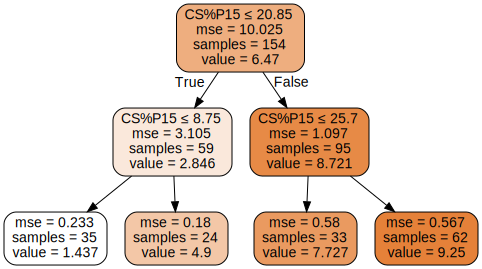

In [57]:
plot_tree_regression(dt_regression, features)